<a href="https://colab.research.google.com/github/thepbordin/aibs_mask_detection_icevision_yolov5/blob/main/MASK_Detection_with_icevision_yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧊 IceVision + SAHI: Mask Detection ด้วย YOLOv5 แบบง่ายมากๆ

โปรเจ็คนี้ถูกสร้างขึ้นเพื่อเป็นตัวอย่างในการสอนการใช้งาน IceVision-Yolov5 ของค่าย [AI-Builders](https://ai-builders.github.io/)

โดยใช้ชุดข้อมูลจาก kaggle [FaceMask-Detection](https://www.kaggle.com/datasets/andrewmvd/face-mask-detection) โดย Larxel

Notebook นี้ ถูกนำมาปรัปปรุงเพื่อการสอนจาก [IceVision + SAHI](https://github.com/obss/sahi) Notebook.

จัดทำและเรียบเรียงโดย [HRNPH](https://github.com/HRNPH) และ [Thepbordin](https://github.com/thepbordin) Ai Builders Gen 2 (2022)

# 1. ทำการติดตั้ง Icevision + SAHI

**ติดตั้ง Library ที่ต้องการจากทางไหนได้บ้าง?** (เลือกวิธีใดวิธีหนึ่ง)


*   Script สำเร็จรูปที่รวบรวม Library จาก Icevision (แบบง่ายที่สุด)
*   ลง Library ด้วยตนเองทีละตัว (ช้าและเรียนรู้มากที่สุด)


ติดตั้ง Library ต่างๆจาก pypi... ใช้ wget เพื่อโหลดไฟล์ Scripts มารัน(pip install ลงเองทีละตัวก็ได้ อันนี้ก็ใช้ pip แต่แบบนี้เร็วกว่า)

### ใช้ Script เพื่อลง Library

In [1]:
!wget https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh

--2022-07-14 09:10:27--  https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2820 (2.8K) [text/plain]
Saving to: ‘icevision_install.sh.2’

icevision_install.s 100%[===================>]   2.75K  --.-KB/s    in 0s      

2022-07-14 09:10:28 (44.1 MB/s) - ‘icevision_install.sh.2’ saved [2820/2820]



In [2]:
import subprocess
try: # เช็คว่ามี GPU รึเปล่า
    subprocess.check_output('nvidia-smi')
    print('มี GPU!')
    print('ทำการติดตั้งสำหรับ CUDA 11 เพื่อใช้งาน GPU')
    process = 'cuda11'    

except Exception: # ถ้าไม่มี
    print('ไม่มี GPU ลงเวอร์ชั่น CPU!')
    process = 'cpu'   

!bash icevision_install.sh {process} master #เรียกใช้งาน Script

มี GPU!
ทำการติดตั้งสำหรับ CUDA 11 เพื่อใช้งาน GPU
Installing icevision + dependencices for cuda11
- Installing torch and its dependencies
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
- Installing mmcv
- Installing mmdet
- Installing mmseg
- Installing icevision from master
- Installing icedata from master
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
icevision installation finished!


### ติดตั้ง SAHI ด้วย Package Installer for Python ซึ่งก็คือ (pip)
`-q` (quiet) เพื่อไม่ให้แสดง logs จาก code จะได้ไม่รกจอ *แต่ถ้าอยากรู้ว่ารกยังไงก็ลองลบดู*

In [3]:
!pip install sahi -q

### Imports Library หลักๆที่ต้องใช้ (IceVision)

In [21]:
from icevision.all import parsers, tfms, Dataset, models, COCOMetric, COCOMetricType, PIL

#2. เตรียมพร้อมข้อมูล

## 2.1 Download Datasets Mask Detection

ที่เก็บบน google drive ด้วย Library Gdown

NOTE: สามารถเปลี่ยนเป็นชุดข้อมูลตัวเองได้

In [5]:
dest_dir = "/content/data/" # โฟล์เดอร์ที่จะแตกไฟล์ไป อย่าเปลี่ยนถ้ายังไม่รู้ว่าตรงไหนใช้ทำอะไร

In [6]:
!pip install gdown -q # ติดตั้ง Gdown เอาไว้โหลดไฟล์จาก Google Drive เฉยๆ
!cd '/content/' && mkdir 'data' && mkdir 'test' # cd เข้าไปใน Folder "/content"(cd = ChangeDirectory) แล้ว(&&) สร้างโฟล์เดอร์(mkdir = 'make directory') "data" และ test
!gdown "https://drive.google.com/u/1/uc?id=189OTIOsi-c1KRmEe81VLPJRKf8q7Ccl7&export=download" # โหลดไฟล์ Zip จากลิ้งค์ ด้วย Gdown --ตรงนี้เปลี่ยนเป็นลิ้งตัวเองได้ ถ้าข้อมูลแบ่งไว้เหมือนกัน--
!unzip -q -u "/content/maskdetection" -d "/content/data/" # แตกไฟล์ zip ไปที่ -d(directory) "/content/data/" ลองกดเปิดไฟล์ด้านซ้ายมาดูได้ -u เอาไว้ update กรณีรันซ้ำแต่มีไฟล์อยู่แล้ว
#      ^ ที่ใส่ -q(quite) เพื่อไม่ให้แสดง logs จะได้ไม่รกจอเฉยๆ (อยากรู้ว่ารกยังไงลองลบออกได้)

mkdir: cannot create directory ‘data’: File exists
Downloading...
From: https://drive.google.com/u/1/uc?id=189OTIOsi-c1KRmEe81VLPJRKf8q7Ccl7&export=download
To: /content/maskdetection.zip
100% 417M/417M [00:01<00:00, 267MB/s]


### เตรียมข้อมูลด้วย Parsers ของ Icevision
โดยแบ่งเป็น Train และ Validation Set

In [7]:
parser = parsers.VOCBBoxParser(annotations_dir= f'{dest_dir}/annotations', images_dir=f'{dest_dir}/images') # parsers เป็นตัวแปรที่มาจาก icevision.all
train_records, valid_records = parser.parse() # parsers ใช้ตั้งระบุ Folder ที่เก็บรูป('/images') กับข้อมูล Bounding box('/annotations') -> จากนั้นแบ่งเป็น Train กับ Valid เอาไว้ใช้เทรนโมเดล

  0%|          | 0/853 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/853 [00:00<?, ?it/s]

AUTOFIX-SUCCESS - (record_id: maksssksksss110) - Clipping bbox xmax from 401 to image width 400 (Before: <BBox (xmin:381, ymin:14, xmax:401, ymax:34)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: maksssksksss231) - Clipping bbox xmax from 401 to image width 400 (Before: <BBox (xmin:392, ymin:86, xmax:401, ymax:106)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: maksssksksss251) - Clipping bbox xmax from 401 to image width 400 (Before: <BBox (xmin:373, ymin:76, xmax:401, ymax:114)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: maksssksksss457) - Clipping bbox xmax from 401 to image width 400 (Before: <BBox (xmin:389, ymin:56, xmax:401, ymax:83)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: maksssksksss5) - Clipping bbox xmax from 401 to image width 400 (Before: <BBox (xmin:364, ymin:30, xmax:401, ymax:66)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SU

## 2.2 การ Normalize ข้อมูล
ปรับชุดข้อมูลให้เข้ากับสิ่งที่ model ต้องการ โดยการ

*   Resize ภาพไปเป็นสี่เหลี่ยมจตุรัส ขนาด image_size = 384

ปรับใช้ทั้งบน Train และ Validation Set



In [8]:
image_size = 384 # กรณีใช้ int ภาพจะ Resize แบบไม่บีบภาพ(Maintain Aspect Ratio) ถ้าใช้ (size, size) ที่เป็น Tuple ภาพจะ Resize แบบไม่สน Aspect Ratio(บีบภาพเป็นสี่เหลี่ยม)
# image size = (384, 384) # <--- ตัวอย่าง
train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=image_size, presize=512), tfms.A.Normalize()]) # Resize Validation Datasets 
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size=image_size), tfms.A.Normalize()]) # Resize Validation Datasets 

train_ds = Dataset(train_records, train_tfms) # ทำชุด Train
valid_ds = Dataset(valid_records, valid_tfms) # ทำชุด Validation

# 3. เตรียมตัวเทรน Model
ครั้งนี้เราเลือกใช้ [YOLOv5](https://github.com/ultralytics/yolov5)

## 3.1 เลือก Model Pretrained ของ YOLOv5

In [9]:
# เลือกโมเดลที่จะใช้เป็น YoloV5 
model_type = models.ultralytics.yolov5
backbone = model_type.backbones.medium
# yolov5 ต้องบอก img_size ที่ใช้ไปด้วย
extra_args = {}
extra_args['img_size'] = image_size

print(model_type, backbone, extra_args)

model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(parser.class_map), **extra_args) # ใช้โมเดล pretrain = True

<module 'icevision.models.ultralytics.yolov5' from '/usr/local/lib/python3.7/dist-packages/icevision/models/ultralytics/yolov5/__init__.py'> <icevision.models.ultralytics.yolov5.utils.YoloV5BackboneConfig object at 0x7fa917300390> {'img_size': 384}


07/14/2022 09:13:05 - INFO - yolov5.models.yolo -   Overriding model.yaml nc=80 with nc=3
07/14/2022 09:13:05 - INFO - yolov5.models.yolo -   
                 from  n    params  module                                  arguments                     
07/14/2022 09:13:05 - INFO - yolov5.models.yolo -     0                -1  1      5280  yolov5.models.common.Conv               [3, 48, 6, 2, 2]              
07/14/2022 09:13:05 - INFO - yolov5.models.yolo -     1                -1  1     41664  yolov5.models.common.Conv               [48, 96, 3, 2]                
07/14/2022 09:13:05 - INFO - yolov5.models.yolo -     2                -1  2     65280  yolov5.models.common.C3                 [96, 96, 2]                   
07/14/2022 09:13:05 - INFO - yolov5.models.yolo -     3                -1  1    166272  yolov5.models.common.Conv               [96, 192, 3, 2]               
07/14/2022 09:13:05 - INFO - yolov5.models.yolo -     4                -1  4    444672  yolov5.models.common.C3   

## 3.2 เตรียมพร้อม Model

### สร้าง/เลือกสิ่งที่ Model ต้องการทั้งหมด

*   สร้าง Dataloaders เพื่อโหลดข้อมูลเข้าโมเดล
*   เลือก Metrics

และสร้าง fastai learner เพื่อใช้เทรน

In [10]:
train_dl = model_type.train_dl(train_ds, batch_size=16, num_workers=8, shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=16, num_workers=8, shuffle=False)

metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


### การหา learning rate ที่เหมาะสม

SuggestedLRs(valley=0.0008317637839354575)


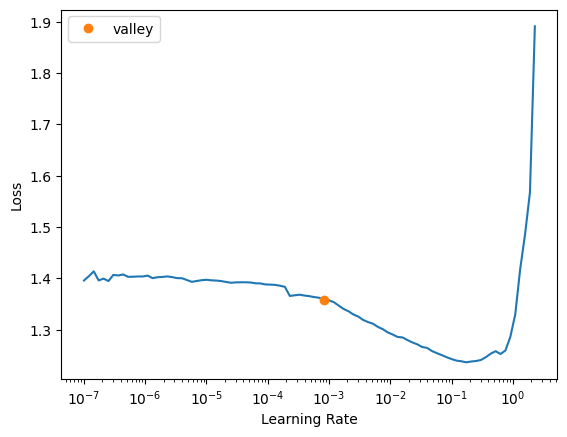

In [11]:
import IPython
# # ถ้าด้านล่าง ใช้ไม่ได้ จะทำการ Reset Notebook ให้กดรันแต่แรกใหม่อีกครั้งนึง
# # ทำไปเพื่อ Reset kernel(ระบบ) ของตัวเครื่องเพื่อให้โหลดใหม่ เพราะบางครั้ง มันจะหา IceVision ไม่เจอ
try:
  print(learn.lr_find())

except AttributeError:
  print('Module ไม่ครบ แค่ restart notebook ก็จะใช้ได้แล้ว')
  print('Reset Kernel... & Fixing...')
  print('แก้ไขเรียบร้อย...')
  print('กด Run All หรือไล่รัน notebook ใหม่อีกครั้ง')
  IPython.Application.instance().kernel.do_shutdown(True)


## 3.3 Training the model!
กำหนด epoch และ lr (learing rate) โดยเหมาะสมและเริ่มเทรน model

NOTE: การปรับค่า epoch ควรจะสังเกต loss หลังจากการเทรน ถ้า model เริ่มไม่ค่อยมีความพัฒนา

In [12]:
epoch = 20
learning_rate = 1e-2 #1x10^-2

เริ่มการเทรน model ด้วยการ `fine tuning`

In [13]:
learn.fine_tune(epoch, learning_rate, freeze_epochs=1)

epoch,train_loss,valid_loss,COCOMetric,time
0,1.124198,1.082783,0.006880,00:28


/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


epoch,train_loss,valid_loss,COCOMetric,time
0,0.775609,0.651018,0.108625,00:30
1,0.660810,0.622024,0.182396,00:29
2,0.587198,0.586183,0.237187,00:29
3,0.555021,0.493915,0.298057,00:29
4,0.530761,0.477273,0.334092,00:29
5,0.518173,0.490088,0.262993,00:29
6,0.492086,0.479849,0.304693,00:29
7,0.478687,0.471199,0.355581,00:30
8,0.463528,0.458201,0.277174,00:29
9,0.440726,0.421477,0.311875,00:29


# 4. ดูผลการเทรน Model
เราจะลองทดสอบกับภาพตัวอย่างที่ model ไม่เคยเห็นมาก่อน

มีภาพให้ทดสอบทั้งหมด 4 ภาพ

*   1.jpg
*   2.jpg
*   3.jpg
*   4.jpg



In [18]:
!gdown 'https://drive.google.com/u/1/uc?id=1jS1gNGBRe8en8vYkT_5EPCtwE_xymqYC&export=download' # โหลด tests data
!unzip -q -u "/content/maskdetectiontestset" -d "/content/data" # แตกไฟล์

Downloading...
From: https://drive.google.com/u/1/uc?id=1jS1gNGBRe8en8vYkT_5EPCtwE_xymqYC&export=download
To: /content/maskdetectiontestset.zip
100% 115k/115k [00:00<00:00, 86.4MB/s]


##4.1 เลือกภาพ Sample ที่จะนำมาทดสอบ
เปลี่ยน `img_sel = "1.jpg"` เพื่อเปลี่ยนภาพทดสอบ

In [19]:
img_sel = "1.jpg"

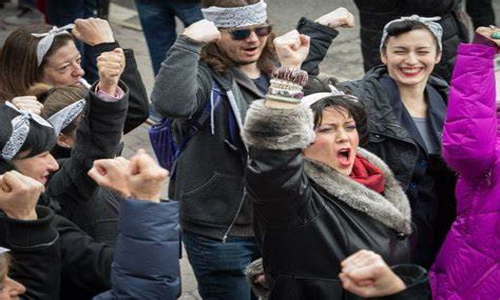

In [22]:
PIL.Image.open(f"/content/data/masktestset/{img_sel}").resize((500, 300)) # มี files ให้ลอง เปลี่ยนเลข 1 - 4

## 4.2 เรียก Result จาก Detection โมเดล

ไปเอาของตัวเองมาลองก็ได้นะ

In [23]:
from icevision.models.inference_sahi import IceSahiModel

`confidence_threshold` คล้ายๆกับ filter ที่คัดกรอง detection ตามความมั่นใจ (confidence) ของ model

In [24]:
sahimodel = IceSahiModel(model_type=model_type, model=model, class_map=parser.class_map, tfms=valid_tfms, confidence_threshold=0.5) #ลองจูนค่า confidence_threshold ได้

In [25]:
pred = sahimodel.get_sliced_prediction(
                f"/content/data/masktestset/{img_sel}",
                keep_sahi_format=False,
                return_img=True,
                slice_height = 128,
                slice_width = 128,
                overlap_height_ratio = 0.2,
                overlap_width_ratio = 0.2,
            )

Performing prediction on 20 number of slices.


แสดงภาพที่ตีกรอบ detection แล้ว

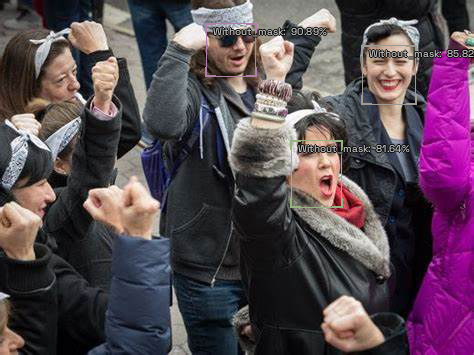

In [26]:
pred["img"]